# Conceptual Saliency

Welcome to the **Conceptual Saliency** notebook! This project aims to apply Formal Concept Analysis (FCA) algorithms to a dataset and analyse the resulting visualizations using saliency mapping techniques.

## Overview

Formal Concept Analysis (FCA) is a mathematical technique used for data analysis, knowledge representation, and information retrieval. By using FCA, we can extract meaningful patterns and relationships from complex datasets. Saliency mapping, on the other hand, helps in identifying the most significant parts of a visualisation, aiding in better interpretation and insights.

## Project Goals

- Implement and test various FCA algorithms on different datasets.
- Generate visualizations of the concept lattices and other FCA structures.
- Apply saliency mapping techniques to these visualizations to highlight key insights.
- Analyse and document the outcomes to refine the workflow and improve results.

## Reference Libraries

Python libraries that I will try:
- For Formal Concept Analysis: [https://github.com/EgorDudyrev/FCApy](https://github.com/EgorDudyrev/FCApy) a python package to work with Formal Concept Analysis.
- For Saliency mapping:
  - [https://github.com/pair-code/saliency](https://github.com/pair-code/saliency)
  - [https://github.com/matthias-k/pysaliency](https://github.com/matthias-k/pysaliency) analyzing and modeling of eye movement

## Reference Datasets

Datasets I will use for testing:
- The Tate Collection: [https://github.com/tategallery/collection](https://github.com/tategallery/collection) starting from some pre-processed data already available here [https://github.com/SPARQL-Anything/showcase-tate](https://github.com/SPARQL-Anything/showcase-tate) 

## Data Preparation

In order to apply FCA methods, the library needs a matrix as input, such as this one

In [ ]:
'''
,fly,hunt,run,swim
dove,True,False,False,False
hen,False,False,False,False
duck,True,False,False,True
goose,True,False,False,True
owl,True,True,False,False
hawk,True,True,False,False
eagle,True,True,False,False
fox,False,True,True,False
dog,False,False,True,False
wolf,False,True,True,False
cat,False,True,True,False
tiger,False,True,True,False
lion,False,True,True,False
horse,False,False,True,False
zebra,False,False,True,False
cow,False,False,False,False
'''

Understanding how to generalise this passage will be subject of further discussion. However, for the time being, I will create a binary matrix `artworkId x subjectName` starting from subjects.csv and subjects-artworks-id.csv files available [here](https://github.com/SPARQL-Anything/showcase-tate).
Namely,

In [ ]:
# subjects.csv
'''
subjectId,subjectName
,
1,subject
4,group/movement
13,architecture
14,agricultural
15,bridges and viaducts
17,features
18,garden structures
19,industrial
20,military
21,monuments
22,periods and styles
23,places of entertainment
24,public and municipal
25,religious
26,residential
...
'''

# subjects-artworks-id.csv
'''
subjectId,artworkId
25,5700
13,5748
4537,8416
92,15718
1519,23478
29,15699
166,105988
92,10108
78,7214
91,23699
14439,20199
...
'''

I will:
1. **Load the CSV files** into data structures.
2. **Merge the data** based on the `subjectId`.
3. **Create the binary matrix** with `artworkId` as rows and `subjectName` as columns, with `True` or `False` values.

In [2]:
from fcapy.context import FormalContext
import os
import pandas as pd

In [3]:
# load subjects
subjects = pd.read_csv('https://raw.githubusercontent.com/SPARQL-Anything/showcase-tate/main/subjects.csv')

# load subjects-artworks relationships
subjects_artworks = pd.read_csv('https://raw.githubusercontent.com/SPARQL-Anything/showcase-tate/main/subjects-artworks-id.csv')

# merge subjects with subjects_artworks to get subject names for each artwork
merged_data = pd.merge(subjects_artworks, subjects, on='subjectId')
print(len(merged_data))

839432


In [5]:
# calculate the number of rows to keep (1/20 of the total rows to run faster for test purposes)
num_rows_to_keep = len(merged_data) // 20

# keep only the first 1/20 of the merged_data
subset_merged_data = merged_data.head(num_rows_to_keep)

# create the binary matrix with True/False values
binary_matrix = subset_merged_data.pivot_table(index='artworkId', columns='subjectName', aggfunc='size', fill_value=0)
binary_matrix = binary_matrix.map(lambda x: True if x > 0 else False)

# ensure the results directory exists
results_dir = '../results'
os.makedirs(results_dir, exist_ok=True)
# define the path for the output file
output_file_path = os.path.join(results_dir, 'artwork_subject_binary_matrix.csv')

# save to CSV
binary_matrix.to_csv(output_file_path)
print(f"Binary matrix saved to '{output_file_path}'")

Binary matrix saved to '../results\artwork_subject_binary_matrix.csv'


## Formal Context

In [7]:
# load the CSV file and ensure the index (artworkId) is of type str
df = pd.read_csv(output_file_path, index_col=0)
df.index = df.index.map(str)

# Create the FormalContext
K = FormalContext.from_pandas(df)

# Print the first five objects data
print(K[:5])

FormalContext (5 objects, 2852 attributes, 7 connections)
  |'As You Like It'|'Bacchus of Sansovino', sculpture|'Belvedere Antinous', sculpture|'Discobolus Preparing for a Throw', sculpture|'Farnese Hercules', sculpture|...|wreath|wren|wrestling|yard|youth|
3 |                |                                 |                               |                                             |                             |...|      |    |         |    |     |
4 |                |                                 |                               |                                             |                             |...|      |    |         |    |     |
5 |                |                                 |                               |                                             |                             |...|      |    |         |    |     |
8 |                |                                 |                               |                                             |          

In [12]:
print(K.extension( ['religious'] ))

['1121', '1155', '1582', '2449', '2509', '4728', '4730', '4731', '4732', '4733', '4736', '4748', '4912', '4916', '5184', '5238', '5700', '6215', '6680', '7063', '8339', '12136', '13028', '14303', '14323', '14631', '14632', '15110', '15112', '15113', '15118', '15119', '15127', '15128', '15129', '15455', '15684', '16513', '16629', '16630', '18844', '18853', '18854', '19582', '19583', '19588', '19590', '19593', '19594', '19595', '19599', '19640', '19643', '19644', '19647', '19649', '19650', '19655', '19656', '19657', '19886', '20121', '20246', '20779', '22901', '22974', '22978', '23133', '23447', '23856', '23857', '23859', '23972', '23973', '24170', '24171', '24463', '24464', '25317', '25694', '26680', '27654', '28093', '28094', '28303', '28323', '28325', '28326', '28328', '28329', '28411', '28413', '28416', '28417', '28422', '28425', '28428', '28429', '28884', '28885', '28888', '28889', '29741', '30360', '31596', '31597', '31804', '31805', '31811', '31812', '31815', '33300', '33303', '33

## Concept Lattice

In [15]:
# create the concept lattice
from fcapy.lattice import ConceptLattice
L = ConceptLattice.from_context(K, algo='Sofia', L_max = 1000, min_supp = 0.1, use_tqdm=True)
print(len(L))

Iter. Sofia projections: 100%|██████████| 2852/2852 [00:03<00:00, 739.37it/s]


1


In [16]:
print(L.top, L.bottom)

0 0


### Visualisation

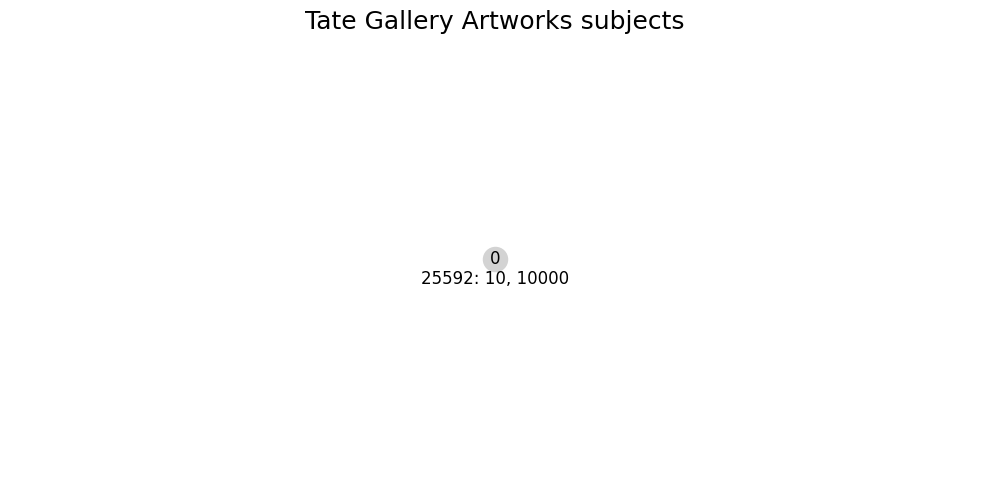

In [17]:
import matplotlib.pyplot as plt
from fcapy.visualizer import LineVizNx
fig, ax = plt.subplots(figsize=(10, 5))
vsl = LineVizNx()
vsl.draw_concept_lattice(L, ax=ax, flg_node_indices=True)
ax.set_title('Tate Gallery Artworks subjects', fontsize=18)
plt.tight_layout()
plt.show()

Right now results are not significant because could be that I prepared data in a wrong way. Anyway, the process should be something similar. Now I will take a ready image (tha should be the output of the process so far) and try the saliency mapping library.

## Saliency Mapping



In [1]:
# Boilerplate imports.
import tensorflow as tf
import numpy as np
import PIL.Image
from matplotlib import pylab as P

# From our repository.
import saliency.core as saliency

%matplotlib inline

In [2]:
# Boilerplate methods.
def ShowImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im)
  P.title(title)

def ShowGrayscaleImage(im, title='', ax=None):
  if ax is None:
    P.figure()
  P.axis('off')

  P.imshow(im, cmap=P.cm.gray, vmin=0, vmax=1)
  P.title(title)

def ShowHeatMap(im, title, ax=None):
  if ax is None:
    P.figure()
  P.axis('off')
  P.imshow(im, cmap='inferno')
  P.title(title)

def LoadImage(file_path):
  im = PIL.Image.open(file_path)
  im = im.resize((224,224))
  im = np.asarray(im)
  return im

def PreprocessImage(im):
  im = tf.keras.applications.vgg16.preprocess_input(im)
  return im

In [10]:
m = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
conv_layer = m.get_layer('block5_conv3')
model = tf.keras.models.Model(inputs=m.input, outputs=[conv_layer.output, m.output])

class_idx_str = 'class_idx_str'
def call_model_function(images, call_model_args=None, expected_keys=None):
    target_class_idx =  call_model_args[class_idx_str]
    images = tf.convert_to_tensor(images)
    with tf.GradientTape() as tape:
        if expected_keys==[saliency.base.INPUT_OUTPUT_GRADIENTS]:
            tape.watch(images)
            _, output_layer = model(images)
            output_layer = output_layer[:,target_class_idx]
            gradients = np.array(tape.gradient(output_layer, images))
            return {saliency.base.INPUT_OUTPUT_GRADIENTS: gradients}
        else:
            conv_layer, output_layer = model(images)
            gradients = np.array(tape.gradient(output_layer, conv_layer))
            return {saliency.base.CONVOLUTION_LAYER_VALUES: conv_layer,
                    saliency.base.CONVOLUTION_OUTPUT_GRADIENTS: gradients}

In [15]:
# Load the image
im_orig = LoadImage('../results/live_in_water_lattice_color_short.png')
im = PreprocessImage(im_orig)

# Show the image
ShowImage(im_orig)

_, predictions = model(np.array([im]))
prediction_class = np.argmax(predictions[0])
call_model_args = {class_idx_str: prediction_class}

print("Prediction class: " + str(prediction_class))

AttributeError: 'numpy.ndarray' object has no attribute 'convert'